In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import KernelCenterer
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import MiniBatchSparsePCA
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import SparseCoder
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import AffinityPropagation
from markdown import markdown
import numpy as np
import hvplot.pandas
import pandas as pd



### Analysis of Birds bones and living habits data set
## An attempt at species categorization using sklearn Kmeans Unsupervised learning.
https://www.kaggle.com/datasets/zhangjuefei/birds-bones-and-living-habits


https://scikit-learn.org/stable/modules/clustering.html#k-means




![Pidgeon Skeleton](https://s-media-cache-ak0.pinimg.com/564x/cb/cb/41/cbcb41cb2c1db6c32c1e869be2172c3b.jpg)





Species identification is an important part of conservation efforts. This project attempts to use the Birds bones and living habits data set to label species based on skeletal features.The idea is that birds skeletal structure should be varied enough to allow for easy and simple identification. 
The data labels are:


*SW* :Swimming \
*W*  :Wading \
*T*  :Terrestrial \
*R*  :Raptors \
*P*  :Scansorial_birds \
*SO* :Singing Birds 

These will be how the data is clustered. No two bird species are exactly alike, so given enough data points are provided this should work. 

Since the data set seemed very distinct (An emu is much larger than say a chicken) K means felt like a very good choice. The basic idea here is: K centroids will be chosen, the model will be fit and when the centroids stop moving is when we are done. Even though K means is supposed to be non-deterministic, more often than not a pidgeon and emu should not be clustered together. 



## Data Loading, and EDA

After the data was read in, the next step was to take a look. Right away it can be noted that the ID column should
be dropped, it serves no purpose. 


|    |   id |   huml |   humw |   ulnal |   ulnaw |   feml |   femw |   tibl |   tibw |   tarl |   tarw | type   |
|---:|-----:|-------:|-------:|--------:|--------:|-------:|-------:|-------:|-------:|-------:|-------:|:-------|
|  0 |    0 |  80.78 |   6.68 |   72.01 |    4.88 |  41.81 |   3.7  |   5.5  |   4.03 |  38.7  |   3.84 | SW     |
|  1 |    1 |  88.91 |   6.63 |   80.53 |    5.59 |  47.04 |   4.3  |  80.22 |   4.51 |  41.5  |   4.01 | SW     |
|  2 |    2 |  79.97 |   6.37 |   69.26 |    5.28 |  43.07 |   3.9  |  75.35 |   4.04 |  38.31 |   3.34 | SW     |
|  3 |    3 |  77.65 |   5.7  |   65.76 |    4.77 |  40.04 |   3.52 |  69.17 |   3.4  |  35.78 |   3.41 | SW     |
|  4 |    4 |  62.8  |   4.84 |   52.09 |    3.73 |  33.95 |   2.72 |  56.27 |   2.96 |  31.88 |   3.13 | SW     |

The shape of the df is (420, 12). After na values are dropped this further reduces to (413,12).


The data is then split into two pieces, the labels (Type) in one df.


|    | type   |     
|---:|:-------|
|  0 | SW     |
|  1 | SW     |
|  2 | SW     |
|  3 | SW     |
|  4 | SW     |







and all of the other pieces of relevant data into another. We would not want the model to know the answers.


|    |   huml |   humw |   ulnal |   ulnaw |   feml |   femw |   tibl |   tibw |   tarl |   tarw |
|---:|-------:|-------:|--------:|--------:|-------:|-------:|-------:|-------:|-------:|-------:|
|  0 |  80.78 |   6.68 |   72.01 |    4.88 |  41.81 |   3.7  |   5.5  |   4.03 |  38.7  |   3.84 |
|  1 |  88.91 |   6.63 |   80.53 |    5.59 |  47.04 |   4.3  |  80.22 |   4.51 |  41.5  |   4.01 |



Then a pair plot was loaded. 

![alt text](Pair_plot_all.png "Pair plot of everything")

The above pair plot shows a lot of covariance and maybe coliniearity. Which makes some sense, if a bird has big hip bones it probably has big leg bones too. But this might not be so great for training a model, and we might want to exclude some of those features.  So far the variables 'huml','humw', 'ulnal','ulnaw', 'tarl' look the most promising being more randomly scattered than say 'femw'. But we should look at a few more pieces of evidence before we fully decide to drop or keep certain variables.

## Box plots to check for outliers

Box plots were plotted against certain features for simple and straightforward outlier detection. And it is very obvious that there are outliers. And they will be removed so they do not skew the data too much.

![alt text](Box_plot_To_check_for_outliers.png "Box plot to check for outliers")

Now that the data is a little bit more cleaned up. I will plot a correlation matrix, which pairs well with the pair plot above. It helps show what variables are highly correlated and how strong that relationship is. Correlation is how closely related certain variables are. There are only a few variables that do not have very strong relationships. Humerus length, Humerus Width, Ulnal length and width and tarsal length all have low correlation values. The Covariance matrix also has values that are very high and shows a definite need for some feature selection. 


![alt text](Correlation_Matrix_before_choosing.png "Pair plot of everything")




![alt text](Covariance_Matrix_before_choosing_(2).png)


To help illustrate the point further, at least a little bit. I ran an analysis on the full data set using the clustering algorithm and have the generated results. 
There are two variables in table below. One is silhouette score or the silhouette coefficient. Which ranges from -1 to 1, 1 being the best value and -1 being the worst.
It is the mean distance between clusters, and the mean distance to the nearest cluster that is not part of that samples cluster. Given by the formula:


\begin{pmatrix}
   b - a\\ \hline
   max(a,b)
\end{pmatrix}  


<h5 align="center">a = intra cluster distance </h5> 
<h5 align="center">b = mean nearest intracluster distance</h5>


|    |    silhouette_score |   rand_score |
|---:|---------:|-------------:|
|  0 | 0.374319 |     0.239816 |



And since I have the ground truth, which are my labels (the bird types) I can run a metric called the adjusted Rand Index. Which uses the actual cluster assignment to provide the score. It is a pairwise measure which computes the number of same or different clusters in the predicted and true clusterings. 
A value of 0.0 means the labels are random independent of the cluster amounts and 1.0 when the clusters are completely identical. So a 1 is good and 0 is not as good.

Rand_score_Calculation : <b>ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)</b> ** thanks scikit learn 

And the obtained result is not that great.Removing some features might help.

Only a few features were selected.And they had a pair plot generated. 

It is very clearly visible that the data looks much more scattered, which might be a good sign. Time to move onto the next part.



![alt text](Pair_plot_reduced.png "pair plot of just a few features")

## Pre processor selection

To scale or not to scale? One of life's big questions if you need to proccess data. 
A great way to tell is by looking at the covariance matrix.

 Which measures the extent to which two variables er vary together.
 And the values in this matrix are very high.


![alt text](Covariance_Matrix_to_show_need_scaling.png "pair plot of just a few features")
![alt text](Correlation_Matrix_before_scaling_but_after_feature_selection.png)


I had several preprocessors to choose from. 

![alt text](For_final_project_unsupervised.jpg "selection of features")

- Standard Scaler - Sets the mean to 0 and variance to 1.

- MinMiaxScaler - Transforms features by scaling to a given range.

- MaxAbsScaler - Scales Each feature by maximum abosulte value.

- RobustScaler- Removes means and scales each to a Quantile range.

- Normalizer - Scales inputs individually to length of data.


So I ran all of these against my data set and their silhouette scores are below. 


![alt text](Selection_preprocessor_results.png)

The silhouette score improved a fair amount from the base model. The adjusted rand score improved only slightly.
And the thing about Kmeans is the results will vary slightly every time. 
When I plotted the results for each pre processing step:

<b> Standard Scaler </b>

![alt text](Standard_Scaler_pre_processing.png)

<b> MinMax Scaler </b>

![alt text](MinMax_Scaler_pre_processing.png)

<b> MaxABS Scaler </b>


![alt text](MaxABS_Scaler_pre_processing.png)

<b> Robust Scaler </b>


![alt text](Robust_Scaler_pre_processing.png)


The below covariance matrix helps highlight this.

![alt text](Covariance_matrix_after_scaling.png)




Each type of pre processor led to a similiar improvement no matter the choices. I wanted to see if another second preprocessor would help improve them further.

I chose Kernel PCA and PCA.
- Kernel PCA uses kernels for dimensionality reduction.

- PCA projects data onto a lower dimensional space.


<b> PCA Results </b>


![alt text](Regular_PCA.png)


<b> KernelPCA </b>

![alt text](KernelPCA.png)

I also ran different kernel types, rbf, linear and cosine. And the results were fairly similiar accross the board.


In [86]:
data50=pd.read_csv('Data_frame_for_plot_of_kernels')
data50.hvplot(x='Run', y=["rbf","linear","cosine"], kind='scatter')

:NdOverlay   [Variable]
   :Scatter   [Run]   (value)

The cosine Kernel performed the best overall. So I chose that to be my kernel. 

I also tried different values for alpha and gamma for my kernels and all of them performed similiarly.


![alt text](Kernel_PCA_gamma001.png)

In [87]:
data70=pd.read_csv('Data_frame_for_plot_of_alpha_gamma')
data70.hvplot(x='Run', y=["Gamma0.001","Gamma1","Gamma10","Gamma100","Alpha0.01","Alpha5"], kind='scatter')

:NdOverlay   [Variable]
   :Scatter   [Run]   (value)

After selecting parameters that seemed to work well I chose best parameters for the clusterer.
I chose kmeans++, and the elkan algorithm. 
It was then time to fit my model and see how well it worked.


## Results and conclusion

No matter what parameters I changed, or how I split my data. My model performance was average at best.

The first prediction or so was usually pretty high for accuracy, but then it quickly dipped and stayed low. 
This leads me to believe that Kmeans was not an appropriate choice for my data set. But I have come away from this project with stronger knowledge of Kmeans and how to apply it. 
I did notice with repetition that the model also continually misclassified category 2. Which means the features are not different enough even when scaled to be able to be distinguished from each other. 
I plotted some results obtained after that feature was dropped. But they are not too different from my original results.
This problem was probably better suited for a supervised learning algorithm. 



In [363]:
data70=pd.read_csv('result_values_final')
data70.hvplot(x='Run', y=["elkan"], kind='scatter')

:Scatter   [Run]   (elkan)

![alt text](Final_clustering.png)

In [85]:
data95=pd.read_csv("full_items_result_values_final")
data95.hvplot(x='Run', y="elkan", kind='scatter')

:Scatter   [Run]   (elkan)

While the clustering here looks a little  better. The actual accuracy of the model ended up being very very poor. 

![alt text](Final_clustering_after_SO_removed.png)

In [127]:
print(birds_x.head().to_markdown())

|    |   huml |   humw |   ulnal |   ulnaw |   feml |   femw |   tibl |   tibw |   tarl |   tarw |
|---:|-------:|-------:|--------:|--------:|-------:|-------:|-------:|-------:|-------:|-------:|
|  0 |  80.78 |   6.68 |   72.01 |    4.88 |  41.81 |   3.7  |   5.5  |   4.03 |  38.7  |   3.84 |
|  1 |  88.91 |   6.63 |   80.53 |    5.59 |  47.04 |   4.3  |  80.22 |   4.51 |  41.5  |   4.01 |
|  2 |  79.97 |   6.37 |   69.26 |    5.28 |  43.07 |   3.9  |  75.35 |   4.04 |  38.31 |   3.34 |
|  3 |  77.65 |   5.7  |   65.76 |    4.77 |  40.04 |   3.52 |  69.17 |   3.4  |  35.78 |   3.41 |
|  4 |  62.8  |   4.84 |   52.09 |    3.73 |  33.95 |   2.72 |  56.27 |   2.96 |  31.88 |   3.13 |


In [2]:
cols = ['id', 'huml', 'humw','ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw', 'type']
birds1= pd.read_csv('bird.csv', names=cols,header = 0)
birds1=birds1.dropna()

In [372]:
len(birds[birds['type']=="W"])

63

In [371]:
len(birds[birds['type']=="T"])

23

In [370]:
len(birds[birds['type']=="R"])

48

In [4]:
birds = birds1.iloc[:,1:12]
birds_y = birds['type']
birds_x = birds.iloc[:,0:10]

In [4]:
birds_x.to_csv("Birds_x")
birds_y.to_csv("Birds_y")
birds.to_csv('Birds_cleaned')

In [5]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(birds_y)
label_encoder.classes_
n_clusters = len(label_encoder.classes_)

In [ ]:
fig1 = sns.pairplot(birds, hue='type')
#fig1.figure.savefig("Pair_plot_all")

So just from this, we can easily tell that certain features can and should be avoided. I can leave them in to start, to help illustrate.



In [16]:
preprocessor = Pipeline([("scaler", MinMaxScaler())])
clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=50))])
pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
pipe.fit(birds_x)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
preprocessed_data = pipe["preprocessor"].transform(birds_x)
score = silhouette_score(preprocessed_data,predicted_labels)
rand = adjusted_rand_score(true_labels,predicted_labels)
print("score",score,"Adjusted_rand",rand)

score 0.3743192844691164 Adjusted_rand 0.23981635004901422


In [46]:
score1 = np.array(score)
randoms = np.array(rand)
score1 = str(score1)
randoms = str(randoms)

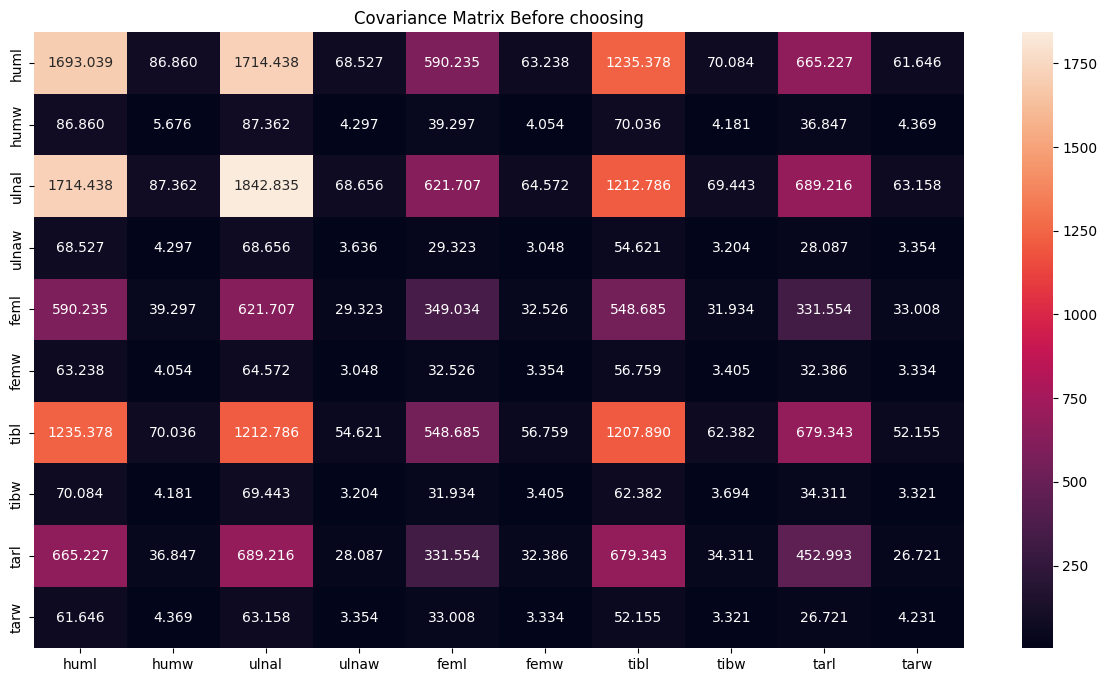

In [17]:
plt.figure(figsize=(15,8))
fig7=sns.heatmap(np.cov(birds_x.T), annot=True,
            cmap="rocket",cbar = True,fmt="0.3f",
            xticklabels=birds_x.columns,
        yticklabels=birds_x.columns)
plt.title("Covariance Matrix Before choosing")
#fig7.figure.savefig("Covariance Matrix before choosing")

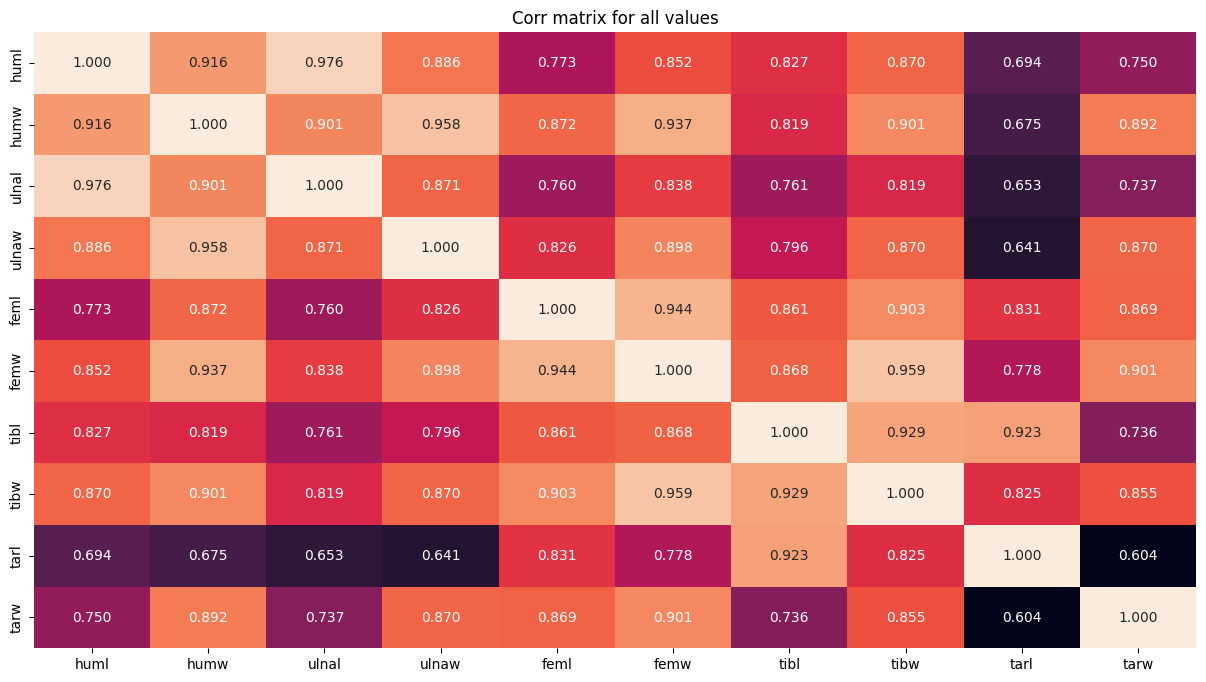

In [14]:
plt.figure(figsize=(15,8))
fig4=sns.heatmap(birds_x.corr(), 
annot = True, fmt = "0.3f", cbar= False, cmap ='rocket',
xticklabels=birds_x.columns,yticklabels=birds_x.columns)
plt.title("Corr matrix for all values")
#fig4.figure.savefig("Correlation Matrix before choosing")

In [ ]:
plt.figure(figsize=(15,8))
fig4=sns.heatmap(birds_x.corr(), 
annot = True, fmt = "0.3f", cbar= False, cmap ='rocket',
xticklabels=birds_x.columns,yticklabels=birds_x.columns)
plt.title("Corr matrix for all values")
#fig4.figure.savefig("Correlation Matrix before choosing")

C:\Users\amcfa\AppData\Local\Temp\ipykernel_13936\3077775758.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


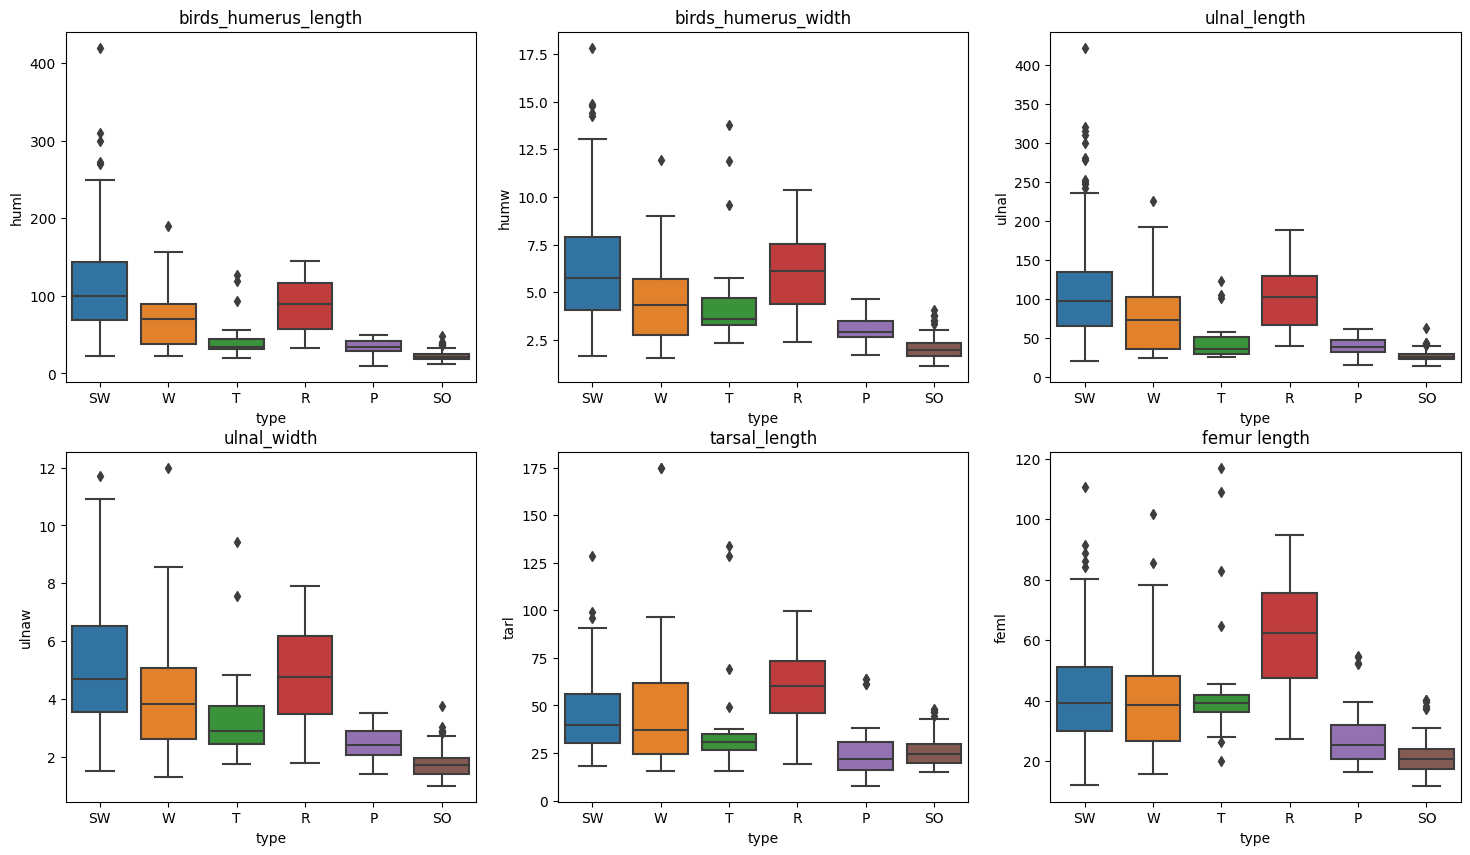

In [165]:
fig3, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.boxplot(ax=axes[0, 0], data=birds, x='type', y='huml').set(title = 'birds_humerus_length')
sns.boxplot(ax=axes[0, 1], data=birds, x='type', y='humw').set(title = 'birds_humerus_width')
sns.boxplot(ax=axes[0, 2], data=birds, x='type', y='ulnal').set(title = 'ulnal_length')
sns.boxplot(ax=axes[1, 0], data=birds, x='type', y='ulnaw').set(title = 'ulnal_width')
sns.boxplot(ax=axes[1, 1], data=birds, x='type', y='tarl').set(title = 'tarsal_length')
sns.boxplot(ax=axes[1, 2], data=birds, x='type', y='feml').set(title = 'femur length')

fig3.show()
#fig3.figure.savefig("Box_plot_To_check_for_outliers")

In [28]:
X_train, X_test, y_train, y_test = train_test_split(birds_x, birds_y, test_size=0.33, random_state=42)

In [29]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(y_train)
label_encoder.classes_
n_clusters = len(label_encoder.classes_)

In [30]:
def data_pipeline(scalerhere):
	preprocessor = Pipeline([("scaler", scalerhere)])
	clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=50))])
	pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
	pipe.fit(X_train)
	preprocessed_data = pipe["preprocessor"].transform(X_train)
	predicted_labels = pipe["clusterer"]["kmeans"].labels_
	score = silhouette_score(preprocessed_data,predicted_labels)
	rand = adjusted_rand_score(true_labels,predicted_labels)
	print("score",score,"Adjusted_rand",rand)
	return score 
	return rand

In [31]:
data_pipeline(StandardScaler())
data_pipeline(MinMaxScaler())
data_pipeline(MaxAbsScaler())

score 0.4088910492642008 Adjusted_rand 0.2535135786394221
score 0.44950636580233805 Adjusted_rand 0.2503053449797916
score 0.44823831400351216 Adjusted_rand 0.2503053449797916


0.44823831400351216

In [34]:
def data_pipeline(scalerhere):
	preprocessor = Pipeline([("scaler", scalerhere)])
	clusterer = Pipeline([('kmeans', AffinityPropagation(random_state=5,max_iter=500))])
	pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
	pipe.fit(X_train)
	preprocessed_data = pipe["preprocessor"].transform(X_train)
	predicted_labels = pipe["clusterer"]["kmeans"].labels_
	score = silhouette_score(preprocessed_data,predicted_labels)
	rand = adjusted_rand_score(true_labels,predicted_labels)
	print("score",score,"Adjusted_rand",rand)
	return score 
	return rand

In [35]:
data_pipeline(StandardScaler())
data_pipeline(MinMaxScaler())
data_pipeline(MaxAbsScaler())

score 0.32655910171314306 Adjusted_rand 0.23088631470627655
score 0.30776218140785105 Adjusted_rand 0.21358090463529966
score 0.29956963847710977 Adjusted_rand 0.19551371165184253


0.29956963847710977

Now, let us subselect just the features with okay correlation values

In [7]:
birds = birds[birds['huml'] < 250]
birds = birds[birds['ulnal'] < 220]

In [8]:

birds_y = birds['type']
birds_x = birds.iloc[:,0:10]
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(birds_y)
label_encoder.classes_
n_clusters = len(label_encoder.classes_)

In [9]:
birds2_x = birds_x[['huml','humw', 'ulnal','ulnaw', 'tarl']]

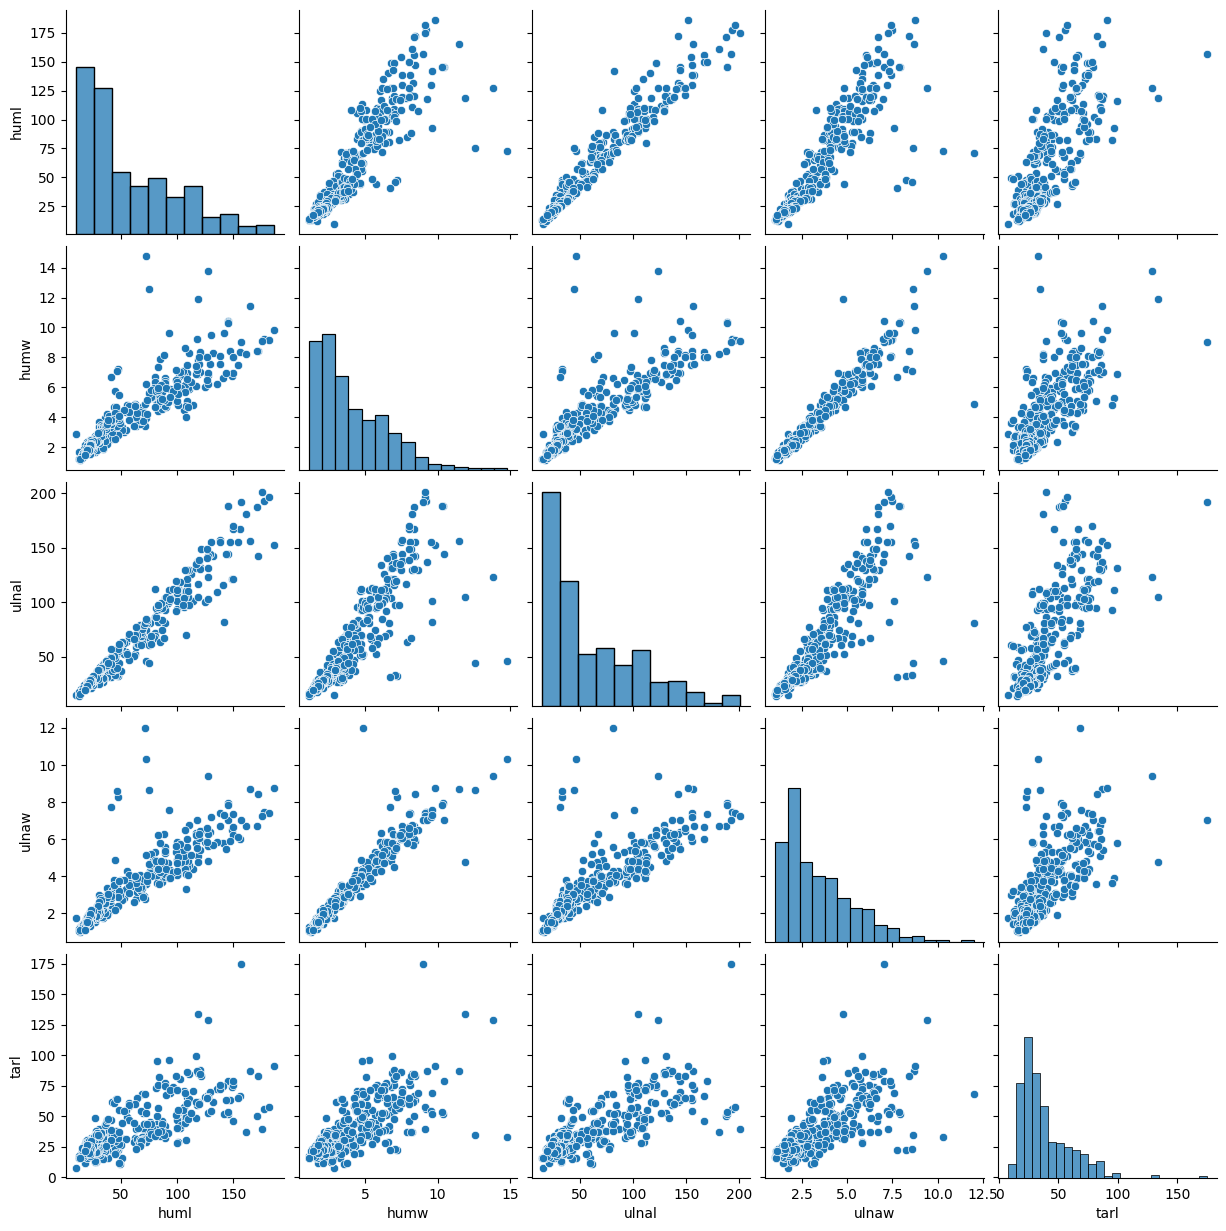

In [10]:
fig5=sns.pairplot(birds2_x)
#fig5.figure.savefig('Pair_plot_reduced')


In [15]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(birds_y)
label_encoder.classes_
n_clusters = len(label_encoder.classes_)

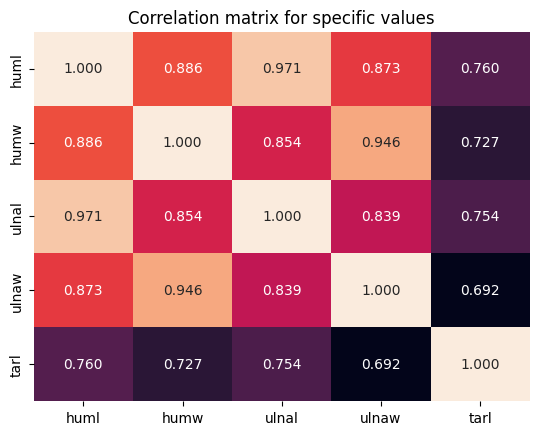

In [21]:
fig8 = sns.heatmap(birds2_x.corr(), 
annot = True, fmt = "0.3f", cbar= False, cmap ='rocket',
xticklabels=birds2_x.columns,yticklabels=birds2_x.columns)
plt.title("Correlation matrix for specific values")
#fig8.figure.savefig('Correlation_Matrix_before_scaling_but_after_feature_selection')

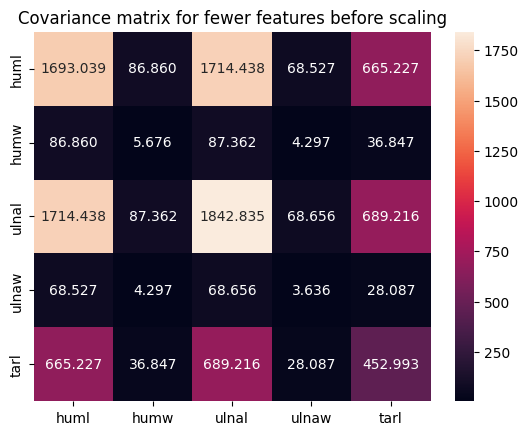

In [20]:
fig7=sns.heatmap(np.cov(birds2_x.T), annot=True,
            cmap="rocket",cbar = True,fmt="0.3f",
            xticklabels=birds2_x.columns,
        yticklabels=birds2_x.columns)
plt.title("Covariance matrix for fewer features before scaling")
#fig7.figure.savefig('Covariance_Matrix_before_scaling')


In [29]:
preprocessor = Pipeline([("scaler", MinMaxScaler())])
clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=50))])
pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
pipe.fit(birds2_x)
preprocessed_data = pipe["preprocessor"].transform(birds2_x)

In [46]:
cov_matrix = np.cov(preprocessed_data.T)
cov_matrix

array([[0.05456344, 0.0361511 , 0.05207228, 0.03536595, 0.02258257],
       [0.0361511 , 0.03050642, 0.0342669 , 0.02864001, 0.01615363],
       [0.05207228, 0.0342669 , 0.05274986, 0.03339274, 0.02205001],
       [0.03536595, 0.02864001, 0.03339274, 0.03004922, 0.01526877],
       [0.02258257, 0.01615363, 0.02205001, 0.01526877, 0.01619807]])

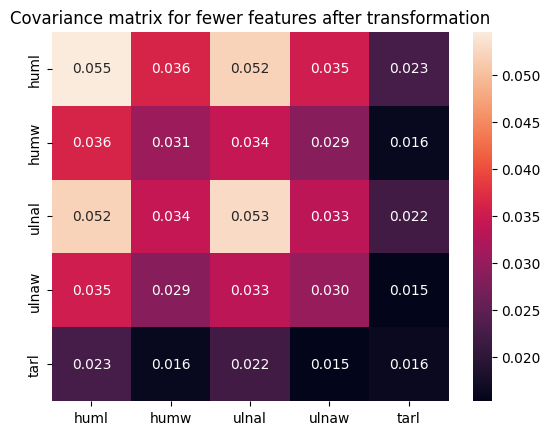

In [30]:
fig8 = sns.heatmap(np.cov(preprocessed_data.T), annot=True,
            cmap="rocket",cbar = True,fmt="0.3f",
            xticklabels=birds2_x.columns,
        yticklabels=birds2_x.columns)
plt.title("Covariance matrix for fewer features after transformation")
#fig8.figure.savefig('Covariance_matrix_after_scaling')

Text(0.5, 1.0, 'Correlation matrix for specific values')

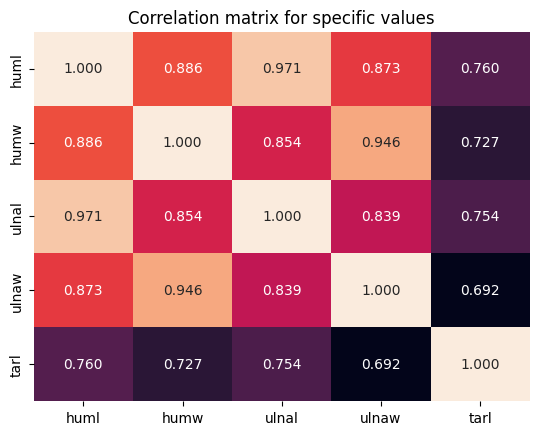

In [33]:
fig9 = sns.heatmap(birds2_x.corr(), 
annot = True, fmt = "0.3f", cbar= False, cmap ='rocket',
xticklabels=birds2_x.columns,yticklabels=birds2_x.columns)
plt.title("Correlation matrix for specific values")
#fig8.figure.savefig('Correlation_Matrix_before_scaling_but_after_feature_selection')

In [26]:
def data_pipeline(scalerhere):
	preprocessor = Pipeline([("scaler", scalerhere)])
	clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=50))])
	pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
	pipe.fit(birds2_x)
	preprocessed_data = pipe["preprocessor"].transform(birds2_x)
	predicted_labels = pipe["clusterer"]["kmeans"].labels_
	score = silhouette_score(preprocessed_data,predicted_labels)
	rand = adjusted_rand_score(true_labels,predicted_labels)
	print(scalerhere,"score",score,"Adjusted_rand",rand)
	return score 
	return rand

In [27]:
data_pipeline(StandardScaler())
data_pipeline(MinMaxScaler())
data_pipeline(MaxAbsScaler())
data_pipeline(RobustScaler())
data_pipeline(Normalizer())

StandardScaler() score 0.4492096969428607 Adjusted_rand 0.2803162216665364
MinMaxScaler() score 0.4692555152632132 Adjusted_rand 0.2843399353968314
MaxAbsScaler() score 0.4678223745149285 Adjusted_rand 0.2843399353968314
RobustScaler() score 0.37985897981434896 Adjusted_rand 0.26255954304132373
Normalizer() score 0.4474515318392583 Adjusted_rand 0.2951425459377803


0.4474515318392583

In [50]:
preprocessor = Pipeline([("scaler", MaxAbsScaler())])
pipe = Pipeline([('preprocessor', preprocessor)])
pipe.fit(X_train)
preprocessed_dataA = pipe["preprocessor"].transform(X_train)
kmeans_kwargs = {
"init": "random",
"n_init": 10,
 "max_iter": 300,
 "random_state": 42,}


sse = []
for k in range(1, 10):
	kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
	kmeans.fit(preprocessed_dataA)
	sse.append(kmeans.inertia_)

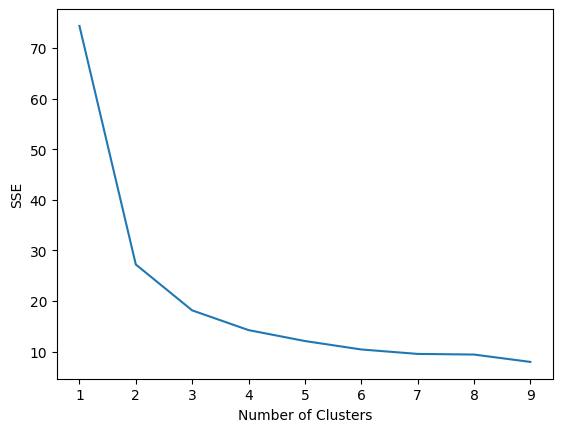

In [51]:
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [52]:
knees = KneeLocator(
range(1, 10), sse, curve="convex", direction="decreasing")

knees.elbow

3

In [53]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(birds_y)
label_encoder.classes_
n_clusters = len(label_encoder.classes_)

In [56]:
def data_pipeline(scalerhere,second):
	preprocessor = Pipeline([("scaler", scalerhere()),("pca",second())])
	clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=50))])
	pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
	pipe.fit(birds2_x)
	preprocessed_data = pipe["preprocessor"].transform(birds2_x)
	predicted_labels = pipe["clusterer"]["kmeans"].labels_
	score = silhouette_score(preprocessed_data,predicted_labels)
	rand = adjusted_rand_score(true_labels,predicted_labels)
	print(scalerhere,"score",score,"Adjusted_rand",rand)
	return score 
	return rand

In [57]:
data_pipeline(StandardScaler,KernelPCA)
data_pipeline(MinMaxScaler,KernelPCA)
data_pipeline(MaxAbsScaler,KernelPCA)
data_pipeline(RobustScaler,KernelPCA)
data_pipeline(Normalizer,KernelPCA)

<class 'sklearn.preprocessing._data.StandardScaler'> score 0.4479230928486663 Adjusted_rand 0.2808158321562784
<class 'sklearn.preprocessing._data.MinMaxScaler'> score 0.4692555152632131 Adjusted_rand 0.2843399353968314
<class 'sklearn.preprocessing._data.MaxAbsScaler'> score 0.4678223745149285 Adjusted_rand 0.2843399353968314
<class 'sklearn.preprocessing._data.RobustScaler'> score 0.3872119104248437 Adjusted_rand 0.276684576348786
<class 'sklearn.preprocessing._data.Normalizer'> score 0.44700018575989864 Adjusted_rand 0.2950296517129429


0.44700018575989864

In [58]:

data_pipeline(StandardScaler,PCA)
data_pipeline(MinMaxScaler,PCA)
data_pipeline(MaxAbsScaler,PCA)
data_pipeline(RobustScaler,PCA)
data_pipeline(Normalizer,PCA)

<class 'sklearn.preprocessing._data.StandardScaler'> score 0.4484319415915024 Adjusted_rand 0.2805196223931722
<class 'sklearn.preprocessing._data.MinMaxScaler'> score 0.46925551526321335 Adjusted_rand 0.2843399353968314
<class 'sklearn.preprocessing._data.MaxAbsScaler'> score 0.4678223745149285 Adjusted_rand 0.2843399353968314
<class 'sklearn.preprocessing._data.RobustScaler'> score 0.37985897981434896 Adjusted_rand 0.26255954304132373
<class 'sklearn.preprocessing._data.Normalizer'> score 0.44700018575989864 Adjusted_rand 0.2950296517129429


0.44700018575989864

In [152]:
def data_pipeline(scalerhere, kernel):
	preprocessor = Pipeline([("scaler", scalerhere()),("pca", KernelPCA(n_components=None, kernel=kernel, gamma=1, fit_inverse_transform=True, alpha=1))])
	clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=50))])
	pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
	pipe.fit(birds2_x)
	preprocessed_data = pipe["preprocessor"].transform(birds2_x)
	predicted_labels = pipe["clusterer"]["kmeans"].labels_
	score = silhouette_score(preprocessed_data,predicted_labels)
	rand = adjusted_rand_score(true_labels,predicted_labels)
	print("score",score,"Adjusted_rand",rand)
	return score 
	return rand

In [153]:
data_pipeline(StandardScaler,'rbf')
data_pipeline(MinMaxScaler,'rbf')
data_pipeline(MaxAbsScaler,'rbf')
data_pipeline(RobustScaler,'rbf')
data_pipeline(Normalizer,'rbf')
data_pipeline(StandardScaler,'linear')
data_pipeline(MinMaxScaler,'linear')
data_pipeline(MaxAbsScaler,'linear')
data_pipeline(RobustScaler,'linear')
data_pipeline(Normalizer,'linear')
data_pipeline(StandardScaler,'cosine')
data_pipeline(MinMaxScaler,'cosine')
data_pipeline(MaxAbsScaler,'cosine')
data_pipeline(RobustScaler,'cosine')
data_pipeline(Normalizer,'cosine')

score 0.21779889956567836 Adjusted_rand 0.24139013638308074
score 0.4604196830857354 Adjusted_rand 0.2843399353968314
score 0.46012060157273155 Adjusted_rand 0.2843399353968314
score 0.2521935508801941 Adjusted_rand 0.2286796315736267
score 0.4458382917701464 Adjusted_rand 0.2951425459377803
score 0.4490861132133715 Adjusted_rand 0.28019198323374617
score 0.4692555152632131 Adjusted_rand 0.2843399353968314
score 0.4678223745149285 Adjusted_rand 0.2843399353968314
score 0.3872119104248437 Adjusted_rand 0.276684576348786
score 0.44745153183925657 Adjusted_rand 0.2951425459377803
score 0.5509459099256819 Adjusted_rand 0.26004022770747875
score 0.3351664605656663 Adjusted_rand 0.2352284295266755
score 0.3096254536530215 Adjusted_rand 0.27456019302373386
score 0.41866194929049105 Adjusted_rand 0.31975876702302236
score 0.44700018575989847 Adjusted_rand 0.2950296517129429


0.44700018575989847

In [154]:
rbf=[0.24139013638308074,0.2843399353968314,0.2843399353968314,0.2286796315736267,0.2951425459377803]

linear =[0.28019198323374617,0.2843399353968314,0.2843399353968314,0.276684576348786,0.2951425459377803]

cosine = [0.26004022770747875,0.2352284295266755,0.27456019302373386,0.31975876702302236,0.2950296517129429]

X_axis = [0.1,0.15,0.2,0.25,0.35]
data50= pd.DataFrame(zip( rbf,linear,cosine,X_axis), 
                     columns =["rbf","linear","cosine",'Run'])
data50.to_csv("Data_frame_for_plot_of_kernels")

True


:NdOverlay   [Variable]
   :Scatter   [Run]   (value)

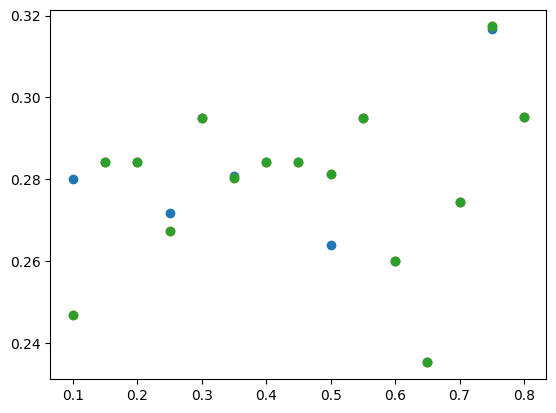

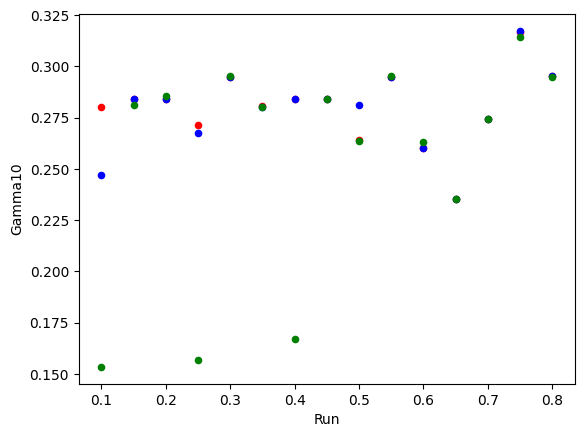

In [149]:
KernelPCA_Gamma0001=[0.28019198323374617,0.2843399353968314,0.2843399353968314,0.2716671398974528,0.2950296517129429,0.2808158321562784,
                     0.2843399353968314,0.2843399353968314,0.2638908915641197,0.2950296517129429,0.26004022770747875,0.2352284295266755,
                     0.27456019302373386,0.3166616221359106,0.2951425459377803]

KernelPCA_Gamma1 =[0.24690159316521398,0.2843399353968314,0.2843399353968314,0.2674506846480375,0.2950296517129429,0.28044143601472404,0.2843399353968314,
                   0.2843399353968314,0.2812523820440132,0.2950296517129429,0.26004022770747875,0.2352284295266755,0.27456019302373386,0.3173576907031335,
                   0.2951425459377803]

KernelPCA_Gamma10 = [0.15338620044323384,0.28139041545305280,0.2853577726055519,0.15677095184043596,0.2953683031278582,0.2803162216665364,0.167217123476631760,0.2843399353968314,
                    0.26365139573785984,0.2951425459377803,0.2632420239317636,0.2352284295266755,0.27456019302373386,0.31426284528256465,0.2950296517129429]

KernelPCA_Gamma100 =[0.0905784145502863,0.24790989297282787,0.2516766768937915,0.08223544617544586,0.28851693079381174,0.28019198323374617,0.2843399353968314,
                     0.2843399353968314,0.28183009428780714,0.2950296517129429,0.2677677880740064,0.23529533074971506,0.27456019302373386,0.3204752492268099,
                     0.2951425459377803]

KernelPCA_alpha01 =[0.24690159316521398,0.2843399353968314,0.2843399353968314,0.2674506846480375,0.2950296517129429,0.28044143601472404,0.2843399353968314,
                   0.2843399353968314,0.2812523820440132,0.2950296517129429,0.26004022770747875,0.2352284295266755,0.27456019302373386,0.3173576907031335,
                   0.2951425459377803]
KernelPCA_alpha5 =[0.25015506339951094,0.2843399353968314,0.2849305053606297,0.2674506846480375,0.2950296517129429,0.2803162216665364,0.2843399353968314,
                   0.2843399353968314,0.26255954304132373,0.2951425459377803,0.25775584970211430,0.2392489784178088,0.27456019302373386,0.3173576907031335,
                   0.2951425459377803]

X_axis = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8]
fig, ax = plt.subplots()
plt.scatter(X_axis,KernelPCA_Gamma0001)
plt.scatter(X_axis,KernelPCA_Gamma1)
plt.scatter(X_axis,KernelPCA_alpha01)
#li = [KernelPCA_Gamma0001,KernelPCA_Gamma1,KernelPCA_Gamma10,KernelPCA_Gamma100,KernelPCA_alpha01,KernelPCA_alpha5,X_axis]
data70= pd.DataFrame(zip( KernelPCA_Gamma0001,KernelPCA_Gamma1,KernelPCA_Gamma10,KernelPCA_Gamma100,KernelPCA_alpha01,KernelPCA_alpha5,X_axis), 
                     columns =["Gamma0.001","Gamma1","Gamma10","Gamma100","Alpha0.01","Alpha5",'Run'])
data70.to_csv("Data_frame_for_plot_of_alpha_gamma")

ax1 = data70.plot(kind='scatter', x='Run', y='Gamma0.001', color='r')    
ax2 = data70.plot(kind='scatter', x='Run', y='Gamma1', color='b', ax=ax1)    
ax3 = data70.plot(kind='scatter', x='Run', y='Gamma10', color='g', ax=ax1)
print(ax1 == ax2 == ax3)

import numpy as np
import hvplot.pandas
import pandas as pd


data70.hvplot(x='Run', y=["Gamma0.001","Gamma1","Gamma10","Gamma100","Alpha0.01","Alpha5"], kind='scatter')

In [64]:
def data_pipeline(scalerhere, kernel,gamma):
	preprocessor = Pipeline([("scaler", scalerhere()),("pca", KernelPCA(n_components=None, kernel=kernel, gamma=gamma, fit_inverse_transform=True, alpha=5))])
	clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=50))])
	pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
	pipe.fit(birds2_x)
	preprocessed_data = pipe["preprocessor"].transform(birds2_x)
	predicted_labels = pipe["clusterer"]["kmeans"].labels_
	score = silhouette_score(preprocessed_data,predicted_labels)
	rand = adjusted_rand_score(true_labels,predicted_labels)
	print("score",score,"Adjusted_rand",rand)
	return score 
	return rand

In [65]:
data_pipeline(StandardScaler,'rbf',0.001)
data_pipeline(MinMaxScaler,'rbf',0.001)
data_pipeline(MaxAbsScaler,'rbf',0.001)
data_pipeline(RobustScaler,'rbf',0.001)
data_pipeline(Normalizer,'rbf',0.001)
data_pipeline(StandardScaler,'linear',0.001)
data_pipeline(MinMaxScaler,'linear',0.001)
data_pipeline(MaxAbsScaler,'linear',0.001)
data_pipeline(RobustScaler,'linear',0.001)
data_pipeline(Normalizer,'linear',0.001)
data_pipeline(StandardScaler,'cosine',0.001)
data_pipeline(MinMaxScaler,'cosine',0.001)
data_pipeline(MaxAbsScaler,'cosine',0.001)
data_pipeline(RobustScaler,'cosine',0.001)
data_pipeline(Normalizer,'cosine',0.001)

score 0.4487652571875507 Adjusted_rand 0.28019198323374617
score 0.4692466001300152 Adjusted_rand 0.2843399353968314
score 0.4678146141133761 Adjusted_rand 0.2843399353968314
score 0.38852682765551866 Adjusted_rand 0.2716671398974528
score 0.44699857108345464 Adjusted_rand 0.2950296517129429
score 0.4479230928486663 Adjusted_rand 0.2808158321562784
score 0.4692555152632131 Adjusted_rand 0.2843399353968314
score 0.4678223745149285 Adjusted_rand 0.2843399353968314
score 0.40366858603273315 Adjusted_rand 0.2638908915641197
score 0.44700018575989864 Adjusted_rand 0.2950296517129429
score 0.5509459099256819 Adjusted_rand 0.26004022770747875
score 0.3351664605656663 Adjusted_rand 0.2352284295266755
score 0.3096254536530215 Adjusted_rand 0.27456019302373386
score 0.4159410994174863 Adjusted_rand 0.3166616221359106
score 0.4474515318392565 Adjusted_rand 0.2951425459377803


0.4474515318392565

In [194]:
def data_pipeline(scalerhere):

	
	preprocessor = Pipeline([("scaler", scalerhere()),("pca", KernelPCA(n_components=None, kernel='cosine', gamma=0.0001, fit_inverse_transform=True, alpha=5))])
	clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=1000,algorithm='lloyd'))])
	pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
	pipe.fit(birds2_x)
	preprocessed_data = pipe["preprocessor"].transform(birds2_x)
	predicted_labels = pipe["clusterer"]["kmeans"].labels_
	score = silhouette_score(preprocessed_data,predicted_labels)
	rand = adjusted_rand_score(true_labels,predicted_labels)
	print("score",score,"Adjusted_rand",rand)
	return score 
	return rand


In [195]:
data_pipeline(StandardScaler)
data_pipeline(MinMaxScaler)
data_pipeline(MaxAbsScaler)
data_pipeline(RobustScaler)
data_pipeline(Normalizer)

score 0.5509459099256819 Adjusted_rand 0.26004022770747875
score 0.335290997702738 Adjusted_rand 0.23529533074971506
score 0.3096254536530215 Adjusted_rand 0.27456019302373386
score 0.41866194929049105 Adjusted_rand 0.31975876702302236
score 0.4474515318392565 Adjusted_rand 0.2951425459377803


0.4474515318392565

In [53]:
preprocessor = Pipeline([("scaler", MinMaxScaler())])
clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=50,algorithm='elkan'))])
pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
pipe.fit(birds2_x)
preprocessed_data = pipe["preprocessor"].transform(birds2_x)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
score = silhouette_score(preprocessed_data,predicted_labels)
rand = adjusted_rand_score(true_labels,predicted_labels)

print("score",score,"Adjusted_rand",rand)


score 0.4692555152632132 Adjusted_rand 0.2843399353968314


In [54]:
ab= pd.DataFrame(pipe["preprocessor"].transform(birds2_x))
ab["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
ab["true_label"] = true_labels

<AxesSubplot: xlabel='0', ylabel='1'>

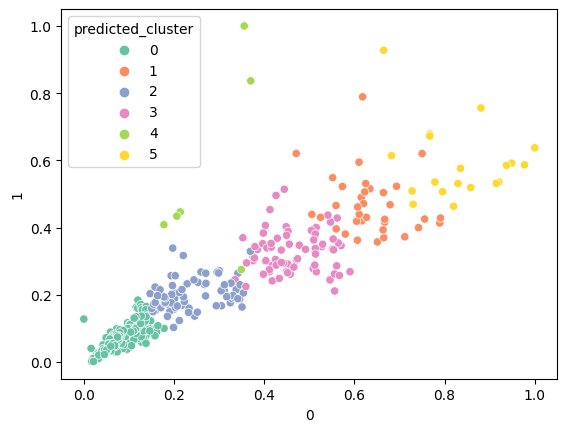

In [55]:
sns.scatterplot(x=0, y=1, data=ab, hue="predicted_cluster",palette="Set2")
#fig.figure.savefig("Standard_Scaler_pre_processing.png") 

In [88]:
mat = confusion_matrix(predicted_labels,true_labels)

In [89]:
def data_pipeline(scalerhere):

	
	preprocessor = Pipeline([("scaler", scalerhere()),("pca", KernelPCA(n_components=None, kernel='rbf', gamma=0.0001, fit_inverse_transform=True, alpha=5))])
	clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=1000,algorithm='lloyd'))])
	pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
	pipe.fit(birds2_x)
	preprocessed_data = pipe["preprocessor"].transform(birds2_x)
	predicted_labels = pipe["clusterer"]["kmeans"].labels_
	score = silhouette_score(preprocessed_data,predicted_labels)
	rand = adjusted_rand_score(true_labels,predicted_labels)
	print("score",score,"Adjusted_rand",rand)
	return score 
	return rand


array([[ 1,  9, 52,  3,  1, 12],
       [ 9, 12,  0, 39,  1, 20],
       [ 0,  1,  0, 52,  0, 13],
       [ 6,  0,  2,  2, 12,  5],
       [ 0,  0, 64,  0,  0,  1],
       [22, 26,  6,  6,  9, 12]], dtype=int64)

In [156]:
preprocessor = Pipeline([("scaler", MinMaxScaler()),("pca", KernelPCA(n_components=None, kernel='rbf', gamma=0.0001, fit_inverse_transform=True, alpha=5))])
clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=50,algorithm='elkan'))])
pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
pipe.fit(birds2_x)
preprocessed_data = pipe["preprocessor"].transform(birds2_x)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
score = silhouette_score(preprocessed_data,predicted_labels)
rand = adjusted_rand_score(true_labels,predicted_labels)

print("score",score,"Adjusted_rand",rand)

score 0.46925462374203264 Adjusted_rand 0.2843399353968314


In [157]:

accuracy_score(predicted_labels,true_labels)

0.1457286432160804

In [158]:
preprocessor = Pipeline([("scaler", MinMaxScaler()),("pca", KernelPCA(n_components=None, kernel='rbf', gamma=0.0001, fit_inverse_transform=True, alpha=5))])
clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=50,algorithm='lloyd'))])
pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
pipe.fit(birds2_x)
preprocessed_data = pipe["preprocessor"].transform(birds2_x)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
score = silhouette_score(preprocessed_data,predicted_labels)
rand = adjusted_rand_score(true_labels,predicted_labels)

print("score",score,"Adjusted_rand",rand)

score 0.46925462374203264 Adjusted_rand 0.2843399353968314


In [159]:
accuracy_score(predicted_labels,true_labels)

0.08040201005025126

In [350]:
preprocessor = Pipeline([("scaler", MinMaxScaler()),("pca", KernelPCA(n_components=None, kernel='cosine', gamma=1, fit_inverse_transform=True, alpha=5))])
clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=10,algorithm='elkan'))])
pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
pipe.fit(birds2_x)
preprocessed_data = pipe["preprocessor"].transform(birds2_x)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
score = silhouette_score(preprocessed_data,predicted_labels)
rand = adjusted_rand_score(true_labels,predicted_labels)

print("score",score,"Adjusted_rand",rand)

score 0.3351664605656663 Adjusted_rand 0.2352284295266755


In [351]:
accuracy_score(predicted_labels,true_labels)

0.271356783919598

In [329]:
repetitions =[0.3592964824120603,0.2562814070351759,0.15829145728643215,0.07035175879396985,
              0.23366834170854273,0.06030150753768844,0.087939698492462320,0.06030150753768844,
              0.1884422110552764,0.06532663316582915,0.27386934673366836,0.09296482412060302,0.08542713567839195]
X_axis = [0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.3,0.325,0.35,0.4,0.45,0.5]

data90= pd.DataFrame(zip( repetitions,X_axis), 
                     columns =['elkan','Run'])
data90.to_csv("result_values_final")

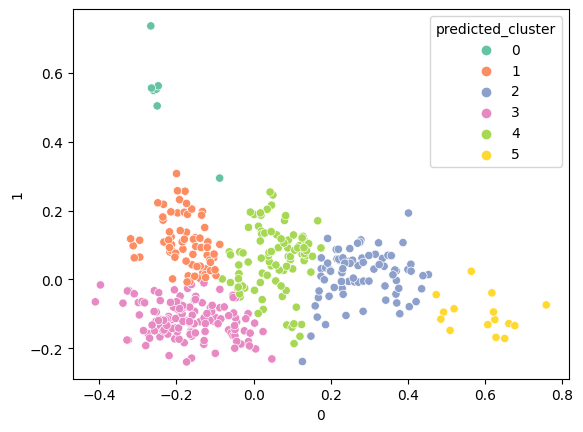

In [326]:
ab= pd.DataFrame(pipe["preprocessor"].transform(birds2_x))
ab["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
ab["true_label"] = true_labels
fig10=sns.scatterplot(x=0, y=1, data=ab, hue="predicted_cluster",palette="Set2")
fig10.figure.savefig("Final_clustering.png") 

In [379]:
birds['type'].unique()

array(['SW', 'W', 'T', 'R', 'P', 'SO'], dtype=object)

In [5]:
birds5=birds.loc[birds['type']!='SO']
birds5
birds_y1 = birds5['type']
birds_x1 = birds5.iloc[:,0:10]

In [6]:
birds_y1.unique()

array(['SW', 'W', 'T', 'R', 'P'], dtype=object)

In [67]:
birds3_x = birds_x1[['huml','humw', 'ulnal','ulnaw', 'tarl']]

In [68]:
label_encoder = LabelEncoder()
true_labels1 = label_encoder.fit_transform(birds_y1)
label_encoder.classes_
n_clusters = len(label_encoder.classes_)

In [485]:
n_clusters

5

In [81]:
preprocessor = Pipeline([("scaler", MinMaxScaler()),("pca", KernelPCA(n_components=None, kernel='cosine', gamma=1, fit_inverse_transform=True, alpha=5))])
clusterer = Pipeline([('kmeans', KMeans(n_clusters = 4, init ='k-means++', n_init=100,algorithm='elkan'))])
pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
pipe.fit(birds3_x)
preprocessed_data = pipe["preprocessor"].transform(birds3_x)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
score = silhouette_score(preprocessed_data,predicted_labels)
rand = adjusted_rand_score(true_labels1,predicted_labels)

print("score",score,"Adjusted_rand",rand)

score 0.31531096227797595 Adjusted_rand 0.0934107416193537


In [82]:
accuracy_score(predicted_labels,true_labels1)

0.16262975778546712

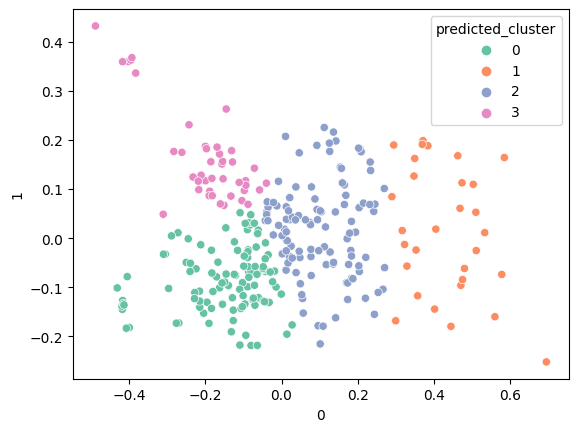

In [84]:
abc= pd.DataFrame(pipe["preprocessor"].transform(birds3_x))
abc["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
abc["true_label"] = true_labels1
fig101=sns.scatterplot(x=0, y=1, data=abc, hue="predicted_cluster",palette="Set2")
fig101.figure.savefig("Final_clustering_after_SO_removed.png")

In [46]:
repetitions =[0.3079584775086505,0.06920415224913495,0.2837370242214533,0.09688581314878893,0.1972318339100346,0.21107266435986158,0.058823529411764705,
              0.1972318339100346,0.19377162629757785,0.22145328719723184,0.12802768166089964,0.17993079584775087,0.08996539792387544]
X_axis = [0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.3,0.325,0.35,0.4,0.45,0.5]

data95= pd.DataFrame(zip( repetitions,X_axis), 
                     columns =['elkan','Run'])
data95.to_csv("full_items_result_values_final")
data95.hvplot(x='Run', y=["elkan"], kind='scatter')


:Scatter   [Run]   (elkan)

Text(0.5, 1.0, 'Covariance Matrix Before choosing')

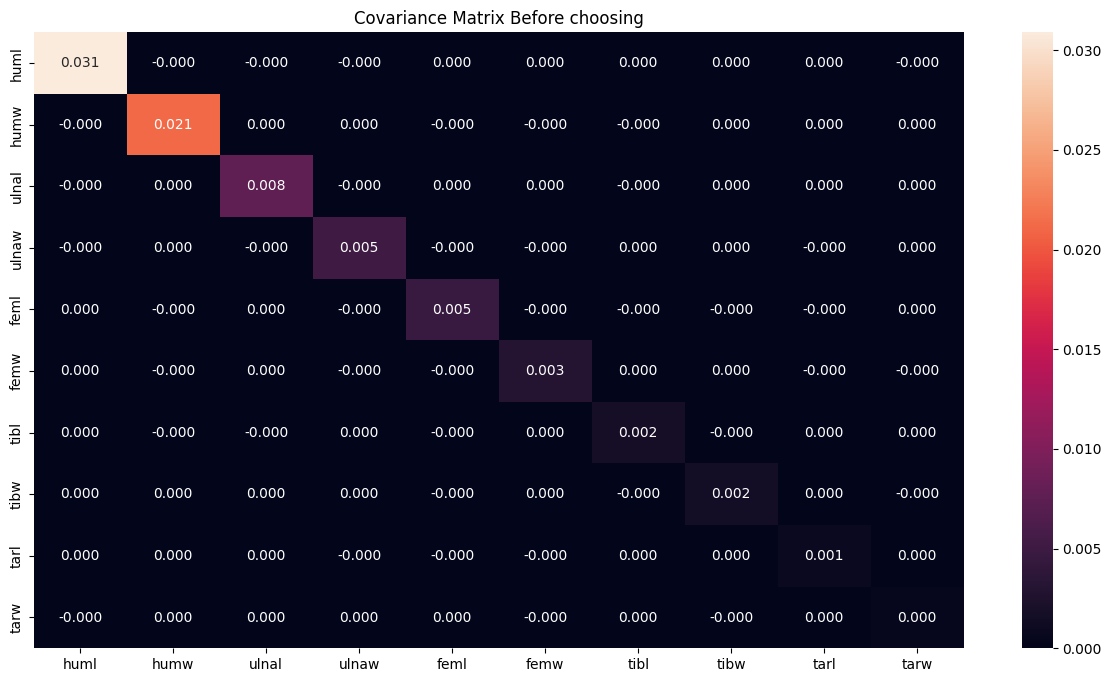

In [15]:
plt.figure(figsize=(15,8))
fig7=sns.heatmap(np.cov(preprocessed_data.T), annot=True,
            cmap="rocket",cbar = True,fmt="0.3f",
            xticklabels=birds_x1.columns,
        yticklabels=birds_x1.columns)
plt.title("Covariance Matrix Before choosing")
#fig7.figure.savefig("Covariance Matrix before choosing")

Text(0.5, 1.0, 'Covariance Matrix Before choosing')

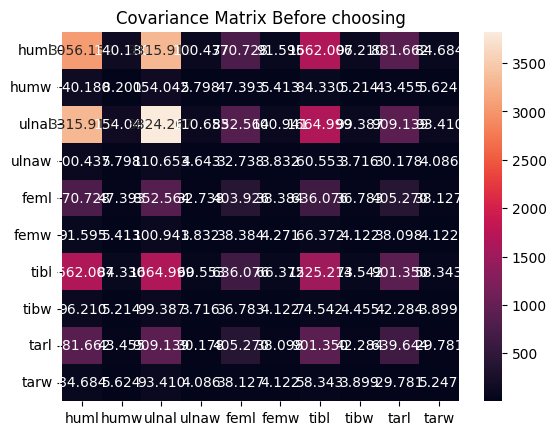

In [14]:
fig7=sns.heatmap(np.cov(pre1.T), annot=True,
            cmap="rocket",cbar = True,fmt="0.3f",
            xticklabels=birds_x1.columns,
        yticklabels=birds_x1.columns)
plt.title("Covariance Matrix Before choosing")

In [65]:
def data_pipeline(scalerhere):
	preprocessor = Pipeline([("scaler", scalerhere)])
	clusterer = Pipeline([('kmeans', KMeans(n_clusters = n_clusters, init ='k-means++', n_init=50))])
	pipe = Pipeline([('preprocessor', preprocessor),('clusterer',clusterer)])
	pipe.fit(birds_x1)
	preprocessed_data = pipe["preprocessor"].transform(birds_x1)
	predicted_labels = pipe["clusterer"]["kmeans"].labels_
	score = silhouette_score(preprocessed_data,predicted_labels)
	rand = adjusted_rand_score(true_labels1,predicted_labels)
	print("score",score,"Adjusted_rand",rand)
	return score 
	return rand

In [66]:
data_pipeline(StandardScaler())
data_pipeline(MinMaxScaler())
data_pipeline(MaxAbsScaler())
data_pipeline(RobustScaler())
data_pipeline(Normalizer())

score 0.39025806996407747 Adjusted_rand 0.03475983165196509
score 0.36883324930211214 Adjusted_rand 0.03303901534137888
score 0.37232788661730265 Adjusted_rand 0.028194719463921696
score 0.37340801603426005 Adjusted_rand 0.03537424451020952
score 0.3654624969028117 Adjusted_rand 0.14614747877031575


0.3654624969028117